<a href="https://colab.research.google.com/github/radar101/SEM-8/blob/main/Boston_House.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [6]:
df = pd.read_csv("BostonHousing.csv")

In [7]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
X = df.drop(columns=["medv"])
y = df['medv']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
model = Sequential()

In [12]:
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(optimizer='adam', loss="mse", metrics=['mae'])

Prepares the model for training:

Optimizer: Adam (efficient and adaptive).

Loss function: Mean Squared Error (MSE) (suitable for regression).

Metric: Mean Absolute Error (MAE) (more interpretable

In [15]:
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=16, validation_split=0.2)

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.6611 - mae: 1.9506 - val_loss: 12.7551 - val_mae: 2.6249
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.7079 - mae: 1.8278 - val_loss: 12.4551 - val_mae: 2.5282
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.3296 - mae: 1.8977 - val_loss: 12.3588 - val_mae: 2.5430
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.0619 - mae: 1.8509 - val_loss: 12.4640 - val_mae: 2.5852
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.1578 - mae: 1.8314 - val_loss: 12.6735 - val_mae: 2.5885
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.1327 - mae: 1.9843 - val_loss: 12.5029 - val_mae: 2.5645
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.7493 - mae: 1.9065 - val_loss: 12.3903 - val_mae: 2.5623
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.5127 - mae: 1.8201 - val_loss: 13.1162 - val_mae: 2.6405
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - los

In [16]:
loss, mae = model.evaluate(X_test_scaled, y_test)
print(f"Test loss: {loss:.2f}")
print(f"Test mae: {mae:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.7486 - mae: 2.2409
Test loss: 12.94
Test mae: 2.42


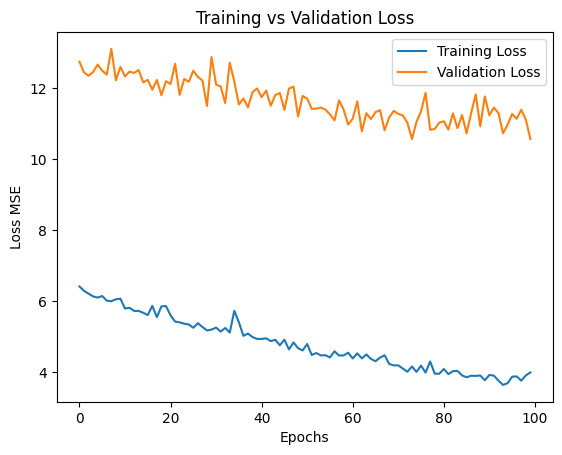

In [24]:
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss MSE")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

🔸 Dataset and Preprocessing

Q1: What is the MEDV column?

It stands for "Median value of owner-occupied homes in $1000s". It's the target variable in the Boston Housing dataset.

Q2: Why did you use StandardScaler?

To normalize the features so that all of them have a mean of 0 and standard deviation of 1. This improves neural network convergence.

🔸 Model Design

Q3: Why did you choose ReLU activation?

ReLU helps introduce non-linearity and avoids the vanishing gradient problem, making training faster and more effective.

Q4: Why is there no activation function in the output layer?

Because it's a regression task. We want the output to be a continuous value, so we use a linear activation (i.e., no activation).

Q5: Why use multiple hidden layers?

Multiple layers allow the model to learn more complex patterns and relationships in the data.

🔸 Training and Evaluation

Q6: What does validation_split=0.2 do?

It reserves 20% of the training data to validate the model during training and monitor for overfitting.

Q7: What are MSE and MAE?

MSE (Mean Squared Error) penalizes large errors more.

MAE (Mean Absolute Error) gives the average error in prediction in actual units.

🔸 Optimizer and Hyperparameters

Q8: Why did you use Adam optimizer?

Adam combines the benefits of both AdaGrad and RMSProp and adapts the learning rate during training, making it more efficient.

Q9: How did you choose batch size and epochs?

Batch size of 16 is a common choice for small to medium datasets. Epochs = 100 ensures enough training time to converge.

🔸 Plotting

Q10: What does the loss curve tell you?

It shows how well the model is learning over time. If validation loss starts increasing while training loss decreases, it might indicate overfitting.

